In [1]:
from keras.datasets import imdb
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Input,Dense, Activation,Dropout,Conv2D,MaxPooling2D,Flatten,UpSampling2D
from keras.optimizers import SGD,Adam
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping 
import os,shutil
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.
C:\Users\kenta takizawa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kenta takizawa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kenta takizawa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kenta takizawa\Anaconda3\lib\site-packages\t

In [3]:
#kerasからmnist、fashion_mnistのインストール
from keras.datasets import mnist
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [4]:
x_train[0].shape

(28, 28)

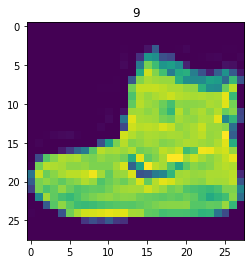

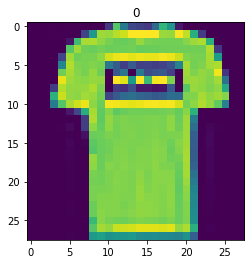

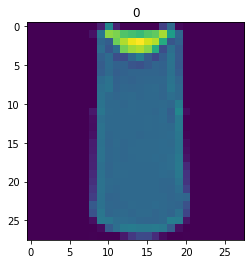

In [9]:
#fashion_mnistの可視化
for i,image in enumerate(x_train[:3]):
    plt.figure()
    plt.imshow(image)
    plt.title(y_train[i])
    


In [10]:
#モデルの作成、ハイパーパラメータの設定
epochs = 5
batch_size = 128
num_classes = 10
num_layers = 2#cnn⇒maxpoolingの数
height,width = x_train[0].shape
colors = 1
optimizer = "rmsprop"
loss_func = "categorical_crossentropy"

def cnn_model(height,width,colors,num_classes,num_layers,optimizer,loss_func):
    
    #Functional APIで記述
    inputs = Input(shape=(height,width,colors))
    x = inputs
    
    for i in range(num_layers):
        x = Conv2D(32*(i+1),(3,3),activation="relu")(x)
        #x = MaxPooling2D((2,2))(x)
    
    #分類の場合は、全結合層を入れる。
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128,activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes,activation="softmax")(x)
    
    model = Model(inputs = inputs,outputs = outputs)
    model.summary()
    model.compile(optimizer=optimizer,loss=loss_func,metrics=["acc"])
    
    return model

In [11]:
cnn = cnn_model(height,width,colors,num_classes,num_layers,optimizer,loss_func)

W0301 19:45:54.704325 16768 deprecation_wrapper.py:119] From C:\Users\kenta takizawa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0301 19:45:54.799301 16768 deprecation_wrapper.py:119] From C:\Users\kenta takizawa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0301 19:45:54.826290 16768 deprecation_wrapper.py:119] From C:\Users\kenta takizawa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0301 19:45:55.012233 16768 deprecation_wrapper.py:119] From C:\Users\kenta takizawa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0301 19:45:55.021235 16768 deprecation_wra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [12]:
from keras.utils import np_utils
#次元数を合わせる。
x_train_2 = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test_2 = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_train_2 = x_train_2.astype("float32")
x_test_2 = x_test_2.astype("float32")
x_train_2 /= 255
x_test_2 /= 255

#ラベルをone-hotに置き換える。
y_train_2 = np_utils.to_categorical(y_train)
y_test_2 = np_utils.to_categorical(y_test)

history = cnn.fit(x_train_2,y_train_2,
                      batch_size=batch_size,
                      epochs = epochs,
                      verbose=1,# ログ出力の指定.0だとログが出ない
                      validation_data=(x_test_2, y_test_2))

W0301 19:46:08.523633 16768 deprecation.py:323] From C:\Users\kenta takizawa\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.4986 - acc: 0.8254 - val_loss: 0.3133 - val_acc: 0.8904
Epoch 2/5
60000/60000 [==============================] - 218s 4ms/step - loss: 0.3175 - acc: 0.8882 - val_loss: 0.2814 - val_acc: 0.9009
Epoch 3/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.2715 - acc: 0.9047 - val_loss: 0.2547 - val_acc: 0.9105
Epoch 4/5
60000/60000 [==============================] - 216s 4ms/step - loss: 0.2467 - acc: 0.9133 - val_loss: 0.2462 - val_acc: 0.9128
Epoch 5/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.2283 - acc: 0.9190 - val_loss: 0.2415 - val_acc: 0.9135


In [13]:
score = cnn.evaluate(x_test_2, y_test_2, verbose=0)
score

[0.24154734612703324, 0.9135]

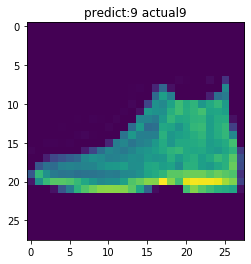

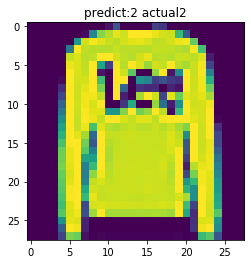

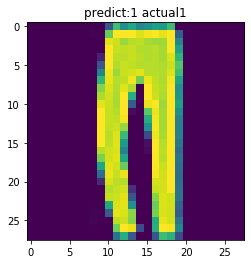

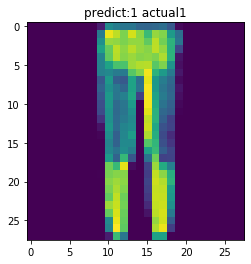

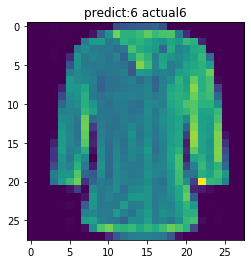

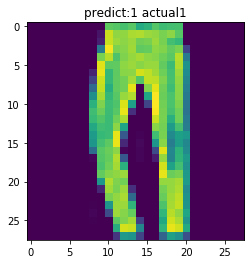

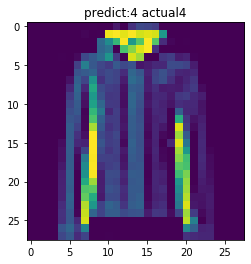

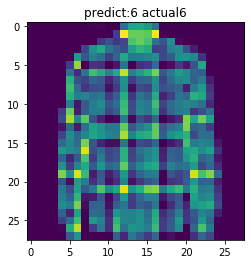

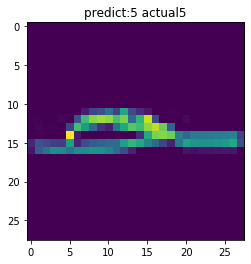

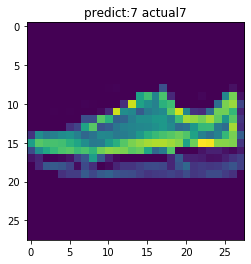

In [14]:
results=cnn.predict(x_test_2[:10])
results_2 = np.argmax(results,axis=1)

for i,image in enumerate(x_test[:10]):
    #image *= 255 
    #image = image.astype("uint8")
    #image = image.reshape((image.shape[0],image.shape[1]))
    
    plt.imshow(image)
    plt.title("predict:"+str(results_2[i])+" actual"+str(y_test[i]))
    plt.show()
    plt.close()

## 深層距離学習の実装

#### 深層距離学習とは：似ているものは近くに、似ていないものは遠くに配置するように学習する手法
#### 利点：従来のCNNクラス分類とは異なり、学習させていないデータが入ってきても、別クラスへ分類してくれる技術。異常検知、未知の異常を分類する時に、その効果を発揮すると思われる。更に実装が非常に簡単。最後の全結合層部分を評価関数に変えるだけで実装可能

In [136]:
#深層距離学習の実装
#モデルの作成、ハイパーパラメータの設定
from keras import regularizers
from keras.initializers import he_normal
from keras.layers import Lambda
epochs = 5
batch_size = 128
num_classes = 9
num_blocks = 2#cnn⇒maxpoolingの数
height,width = x_train[0].shape
colors = 1
optimizer = "Adam"
loss_func = "categorical_crossentropy"
    

def l2_softmax_model(height,width,colors,num_classes,blocks,optimizer,loss_func):
    
    #Functional APIで記述
    inputs = Input(shape=(height,width,colors))
    x = inputs
    
    for i in range(num_blocks):
        x = Conv2D(32*(i+1),(3,3),activation="relu", kernel_initializer=he_normal())(x)
        x = Conv2D(32*(i+2),(3,3),activation="relu", kernel_initializer=he_normal())(x)
        x = MaxPooling2D((2,2))(x)
    #分類の場合は、全結合層を入れる。
    #x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    #下の1行を追加するだけ。自分で作れ！
    x = Lambda(lambda xx: 5*(xx)/K.sqrt(K.sum(xx**2)))(x)
    #x = Dense(128,activation='liear', activity_regularizer=regularizers.l2(16))(x)
    #x = Dense(128,activation="relu")(x)#この行は一般的なcnn
    #x = Dropout(0.5)(x)
    outputs = Dense(num_classes,activation="softmax")(x)
    
    model = Model(inputs = inputs,outputs = outputs)
    model.summary()
    model.compile(optimizer=optimizer,loss=loss_func,metrics=["acc"])
    
    return model

In [137]:
l2_soft_max = l2_softmax_model(height,width,colors,num_classes,num_layers,optimizer,loss_func)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 96)          55392     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 96)          0         
__________

In [51]:
history = l2_soft_max.fit(x_train_2,y_train_2,
                      batch_size=batch_size,
                      epochs = epochs,
                      verbose=1,# ログ出力の指定.0だとログが出ない
                      validation_data=(x_test_2, y_test_2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 549s 9ms/step - loss: 0.9874 - acc: 0.7561 - val_loss: 0.5550 - val_acc: 0.7973
Epoch 2/5
60000/60000 [==============================] - 540s 9ms/step - loss: 0.4753 - acc: 0.8380 - val_loss: 0.4153 - val_acc: 0.8516
Epoch 3/5
60000/60000 [==============================] - 538s 9ms/step - loss: 0.3788 - acc: 0.8686 - val_loss: 0.3570 - val_acc: 0.8750
Epoch 4/5
60000/60000 [==============================] - 536s 9ms/step - loss: 0.3287 - acc: 0.8861 - val_loss: 0.3200 - val_acc: 0.8843
Epoch 5/5
 3840/60000 [>.............................] - ETA: 8:19 - loss: 0.3109 - acc: 0.8943

KeyboardInterrupt: 

In [52]:
score = l2_soft_max.evaluate(x_test_2, y_test_2, verbose=0)
score

[0.3772110170722008, 0.888]

## 深層距離学習を使った異常検知

In [73]:
#異常を９番、それ以外を正常として、異常検知できるか。
arg_y_train = np.argwhere(y_train<9)#9番以下の要素を持ってくる。
arg_y_test = np.argwhere(y_test>=8)
x_train_2 = x_train[arg_y_train]
x_test_2 = x_test[arg_y_test]

#次元数を合わせる。
x_train_3 = x_train_2.reshape((x_train_2.shape[0],x_train_2.shape[2],x_train_2.shape[3],1))
x_test_3 = x_test_2.reshape((x_test_2.shape[0],x_test_2.shape[2],x_test_2.shape[3],1))
x_train_3 = x_train_3.astype("float32")
x_test_3 = x_test_3.astype("float32")
x_train_3 /= 255
x_test_3 /= 255

#ラベルをone-hotに置き換える。
y_train_2 = np.array([a for a in y_train if not a == 9])
y_test_2 = np.array([a for a in y_test if a == 9 or a == 8])

y_train_3 = np_utils.to_categorical(y_train_2)
y_test_3 = np_utils.to_categorical(y_test_2)


In [138]:
#学習させる。
history = l2_soft_max.fit(x_train_3,y_train_3,
                      batch_size=batch_size,
                      epochs = epochs,
                      verbose=1)# ログ出力の指定.0だとログが出ない
                      #validation_data=(x_test_2, y_test_2))


Epoch 1/5
54000/54000 [==============================] - 280s 5ms/step - loss: 1.2934 - acc: 0.7135
Epoch 2/5
54000/54000 [==============================] - 256s 5ms/step - loss: 0.6267 - acc: 0.8156
Epoch 3/5
54000/54000 [==============================] - 253s 5ms/step - loss: 0.4492 - acc: 0.8658
Epoch 4/5
54000/54000 [==============================] - 252s 5ms/step - loss: 0.3607 - acc: 0.8888
Epoch 5/5
54000/54000 [==============================] - 270s 5ms/step - loss: 0.3103 - acc: 0.9012


In [93]:
#異常検知を実行するためには、
#1:まず、今あるデータで深層距離学習を使って学習・分類する。
#2:次に、異常検知まで加えたい時には、最終層の１つ前の層にある距離の出力を持ってくる。
#3:距離の出力を得たら、それを何らかの分類器に入れて、異常検知する。
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

def get_score(model, x_train, x_test):
    model_s = Model(inputs=model.input,outputs=model.layers[-2].output)
    train = model_s.predict(x_train, batch_size=1)
    test = model_s.predict(x_test, batch_size=1)

    train = train.reshape((len(x_train),-1))
    test = test.reshape((len(x_test),-1))

    ms = MinMaxScaler()
    train = ms.fit_transform(train)
    test = ms.transform(test)

    # fit the model
    lof = LocalOutlierFactor(n_neighbors=9)
    y_pred = lof.fit(train)

    # plot the level sets of the decision function
    Z = -lof._decision_function(test)

    return Z



In [127]:
l2_soft_max.layers[-2].output

<tf.Tensor 'lambda_5/truediv:0' shape=(?, ?) dtype=float32>

In [129]:
def cosine_similarity(x1, x2): 
    if x1.ndim == 1:
        x1 = x1[np.newaxis]
    if x2.ndim == 1:
        x2 = x2[np.newaxis]
    x1_norm = np.linalg.norm(x1, axis=1)
    x2_norm = np.linalg.norm(x2, axis=1)
    cosine_sim = np.dot(x1, x2.T)/(x1_norm*x2_norm+1e-10)
    return cosine_sim

def get_distance(model,x_train,x_test):
    model_s = Model(inputs=model.input,outputs=model.layers[-2].output)
    train = model_s.predict(x_train, batch_size=1)
    test = model_s.predict(x_test, batch_size=1)

    train = train.reshape((len(x_train),-1))
    test = test.reshape((len(x_test),-1))
    ms = MinMaxScaler()
    train = ms.fit_transform(train)
    test = ms.transform(test)
    
    #ここから距離を計算する。
    #cos類似度の場合
    distance = []
    for i in range(len(test)):
        cos_similarity = cosine_similarity(test[i], train) # shape(len(test), len(train))
        distance.append(np.max(cos_similarity))#類似度が高い⇒距離が短い
    
    return np.array(distance)

In [128]:
get_score(l2_soft_max, x_train_3[:100], x_test_3[:10])

array([-0.5       , -0.48095608, -0.50051184, -0.49875375, -0.47299587,
       -0.48373541, -0.44814338, -0.49668853, -0.41779448, -0.47681919])

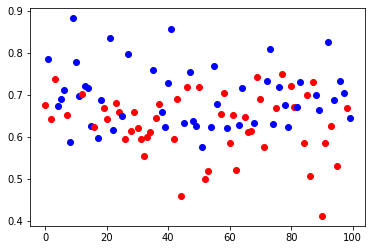

In [130]:
#正常と異常のラベルを分別する。
#score=get_score(l2_soft_max, x_train_3[:1000], x_test_3[:100])
distance = get_distance(l2_soft_max, x_train_3[:1000], x_test_3[:100])

for i,s in enumerate(distance):
    if y_test_2[i]==9:
        c = "r"
    else:
        c = "b"
    plt.plot(i,s,linestyle="",marker="o",c=c) 
plt.show()    


In [120]:
model = l2_soft_max
model_s = Model(inputs=model.input,outputs=model.layers[-2].output)
train = model_s.predict(x_train_3[:1], batch_size=1)
test = model_s.predict(x_test_3[:2], batch_size=1)

train = train.reshape((len(x_train_3[:1]),-1))
test = test.reshape((len(x_test_3[:2]),-1))

### 考察：自作のCNN＋l2softmaxでは分類は可能だが、異常検知精度が恐ろしく低い。
### 理由としては、①特徴抽出が甘くて、埋め込み空間での距離がそもそも短い
### ②特徴の次元数が多すぎると、次元の呪いで距離が近くになってしまう？

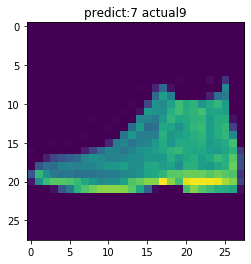

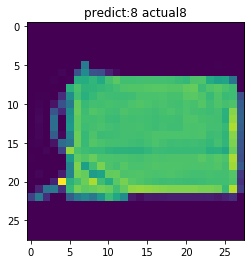

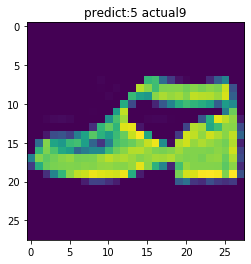

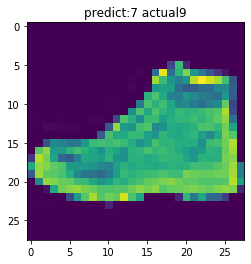

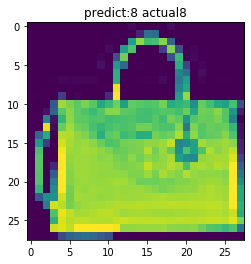

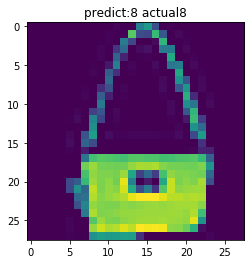

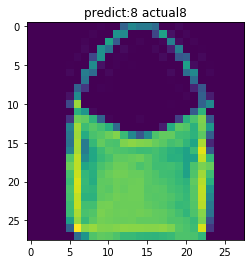

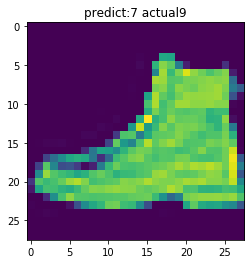

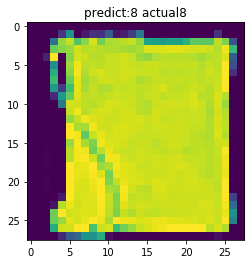

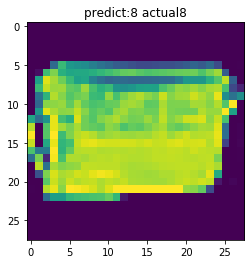

In [80]:
results=l2_soft_max.predict(x_test_3[:10])
results_2 = np.argmax(results,axis=1)

for i,image in enumerate(x_test_2[:10]):
    #image *= 255 
    #image = image.astype("uint8")
    #image = image.reshape((image.shape[0],image.shape[1]))
    image = image.reshape((image.shape[1],image.shape[2]))
    
    plt.imshow(image)
    plt.title("predict:"+str(results_2[i])+" actual"+str(y_test_2[i]))
    plt.show()
    plt.close()



### ConvAEの実装

In [55]:
#やることはcnnの分類とほぼ同じ。教師と誤差が変わるだけ。
#モデルの作成、ハイパーパラメータの設定
epochs = 5
batch_size = 128
num_classes = 10
num_layers = 2#cnn⇒maxpoolingの数
height,width = x_train[0].shape
colors = 1
optimizer = "rmsprop"
loss_func = "mse"

def ConvAE_model(height,width,colors,num_classes,num_layers,optimizer,loss_func):
    
    #Functional APIで記述
    inputs = Input(shape=(height,width,colors))
    x = inputs
    
    for i in range(num_layers):
        x = Conv2D(32*(i+1),(3,3),activation="relu",padding="same")(x)
        #x = MaxPooling2D((2,2))(x)
    
    #復元の場合は、conv2Dでアップする。
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)
    encoded = x
    x = UpSampling2D((2,2))(encoded)
    
    for i in reversed(range(num_layers)):
        x = Conv2D(32*(i+1),(3,3),activation="relu",padding="same")(x)
    x = Conv2D(1,(3,3),activation="relu",padding="same")(x)
    decoded = x
    model = Model(inputs = inputs,outputs = decoded)
    model.summary()
    model.compile(optimizer=optimizer,loss=loss_func)
    
    return model


In [56]:
convAE = ConvAE_model(height,width,colors,num_classes,num_layers,optimizer,loss_func)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 64)        36928     
__________

In [60]:
#次元数を合わせる。
x_train_2 = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test_2 = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_train_2 = x_train_2.astype("float32")
x_test_2 = x_test_2.astype("float32")
x_train_2 /= 255
x_test_2 /= 255

history = convAE.fit(x_train_2,x_train_2,
                      batch_size=batch_size,
                      epochs = epochs,
                      verbose=1)

Epoch 1/5
60000/60000 [==============================] - 958s 16ms/step - loss: 0.0064 - acc: 0.8149
Epoch 2/5
 5376/60000 [=>............................] - ETA: 14:47 - loss: 0.0026 - acc: 0.8161

KeyboardInterrupt: 

Text(0.5, 1.0, 'restored')

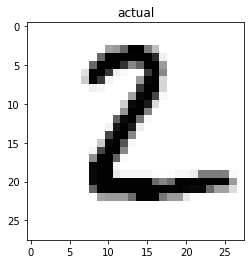

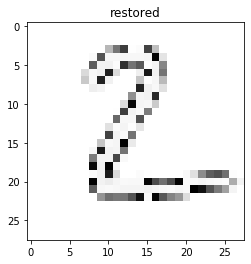

In [67]:
restored_im=convAE.predict(x_test_2[1].reshape((1,28,28,1)))
restored_im *=255
restored_im = restored_im.astype("uint8")

plt.figure()
plt.imshow(x_test_2[1].reshape((28,28)),cmap="Greys")
plt.title("actual")

plt.figure()
plt.imshow(restored_im.reshape(28,28),cmap="Greys")
plt.title("restored")